In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

diabetes = datasets.load_diabetes()
diab = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diab['Target']=diabetes.target
diab2 = diab.copy(deep=True)
print(diab)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target  
0   -0.002592  0.019907 -0.0176

In [2]:
print(diab.min())

age       -0.107226
sex       -0.044642
bmi       -0.090275
bp        -0.112399
s1        -0.126781
s2        -0.115613
s3        -0.102307
s4        -0.076395
s5        -0.126097
s6        -0.137767
Target    25.000000
dtype: float64


In [3]:
# since the possible independent variables contain negative values and this is a multi-regression model that can contain parameters raised to even and odd powers,
# these values need to be raised to contain nonnegative values to maintain consistency in statistical calculations
# if left alone the variances would swing wildly depending if the power was odd or even oscilating the negative values from negative to positive and back

diab.iloc[:,:] += 5
print(diab)

          age       sex       bmi        bp        s1        s2        s3  \
0    5.038076  5.050680  5.061696  5.021872  4.955777  4.965179  4.956599   
1    4.998118  4.955358  4.948526  4.973672  4.991551  4.980837  5.074412   
2    5.085299  5.050680  5.044451  4.994330  4.954401  4.965806  4.967644   
3    4.910937  4.955358  4.988405  4.963344  5.012191  5.024991  4.963962   
4    5.005383  4.955358  4.963615  5.021872  5.003935  5.015596  5.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  5.041708  5.050680  5.019662  5.059744  4.994303  4.997434  4.971326   
438  4.994485  5.050680  4.984094  4.932358  5.049341  5.079165  4.971326   
439  5.041708  5.050680  4.984094  5.017293  4.962656  4.986160  4.975007   
440  4.954528  4.955358  5.039062  5.001215  5.016318  5.015283  4.971326   
441  4.954528  4.955358  4.926970  4.918587  5.083740  5.027809  5.173816   

           s4        s5        s6  Target  
0    4.997408  5.019907  4.9823

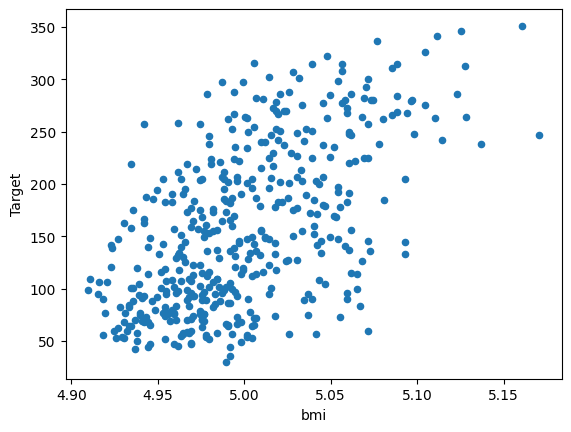

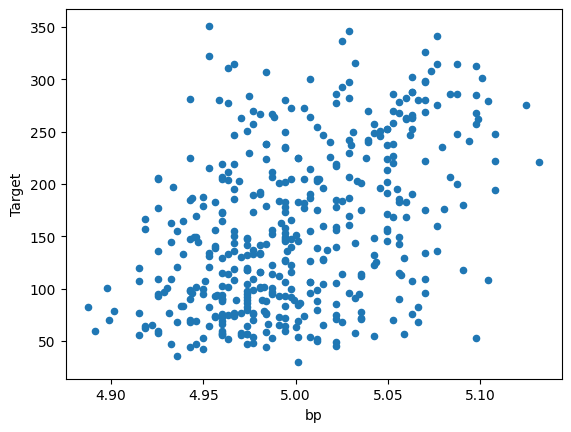

In [4]:
diab.plot(x='bmi', y='Target', kind='scatter')
plt.show()
diab.plot(x='bp', y='Target', kind='scatter')
plt.show()


          age       sex       bmi        bp        s1        s2        s3  \
0    5.038076  5.050680  5.061696  5.021872  4.955777  4.965179  4.956599   
1    4.998118  4.955358  4.948526  4.973672  4.991551  4.980837  5.074412   
2    5.085299  5.050680  5.044451  4.994330  4.954401  4.965806  4.967644   
3    4.910937  4.955358  4.988405  4.963344  5.012191  5.024991  4.963962   
4    5.005383  4.955358  4.963615  5.021872  5.003935  5.015596  5.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  5.041708  5.050680  5.019662  5.059744  4.994303  4.997434  4.971326   
438  4.994485  5.050680  4.984094  4.932358  5.049341  5.079165  4.971326   
439  5.041708  5.050680  4.984094  5.017293  4.962656  4.986160  4.975007   
440  4.954528  4.955358  5.039062  5.001215  5.016318  5.015283  4.971326   
441  4.954528  4.955358  4.926970  4.918587  5.083740  5.027809  5.173816   

           s4        s5        s6      Target  
0    4.997408  5.019907  4.

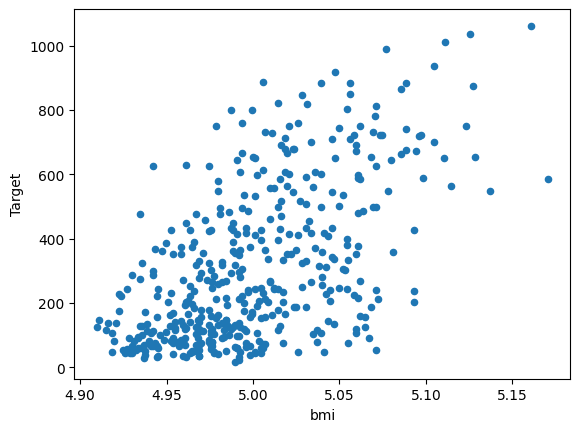

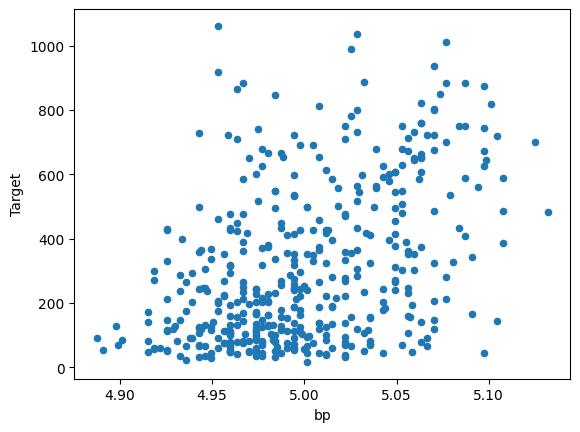

In [5]:
# for the sake of this demonstration we want to make the target less linear and raise the use of polynomials
diab['Target'] = (diab['Target']**1.7)*.05
print(diab)

diab.plot(x='bmi', y='Target', kind='scatter')
plt.show()
diab.plot(x='bp', y='Target', kind='scatter')
plt.show()

In [6]:
# expand the dataset to also include each parameter raised to the 2nd, 3rd and 4th powers
for colname in diab.columns:
    if colname != 'Target':
        colname_pos_array = diab.columns.get_indexer([colname]) #returns an array of where each value specified is found.  In this case it'd be an array of 1 since we're only searching for 1 value
        colname_pos = int(colname_pos_array[0])
        x2 = diab[colname]**2
        x2_name = colname + '_x2'
        diab.insert(loc=colname_pos+1, column=x2_name, value=x2)

        x3 = diab[colname]**3
        x3_name = colname + '_x3'
        diab.insert(loc=colname_pos+2, column=x3_name, value=x3)

        x4 = diab[colname]**4
        x4_name = colname + '_x4'
        diab.insert(loc=colname_pos+4, column=x4_name, value=x4)

print(diab)

          age     age_x2      age_x3       sex     sex_x2      sex_x3  \
0    5.038076  25.382209  127.877495  5.050680  25.509370  128.839666   
1    4.998118  24.981183  124.858902  4.955358  24.555577  121.681681   
2    5.085299  25.860265  131.507177  5.050680  25.509370  128.839666   
3    4.910937  24.117303  118.438556  4.955358  24.555577  121.681681   
4    5.005383  25.053860  125.404164  4.955358  24.555577  121.681681   
..        ...        ...         ...       ...        ...         ...   
437  5.041708  25.418824  128.154300  5.050680  25.509370  128.839666   
438  4.994485  24.944885  124.586864  5.050680  25.509370  128.839666   
439  5.041708  25.418824  128.154300  5.050680  25.509370  128.839666   
440  4.954528  24.547343  121.620486  4.955358  24.555577  121.681681   
441  4.954528  24.547343  121.620486  4.955358  24.555577  121.681681   

         age_x4      sex_x4       bmi     bmi_x2  ...       s4_x4        s5  \
0    644.256526  650.727941  5.061696  25.62

In [7]:
# backward elimination selection
vars = set(diab.columns)
vars.remove('Target')
intercept = True
pval_threshold = .001
highest_pval = .1

while(len(vars) > 0 and highest_pval > pval_threshold):
    if intercept == True:
        regr_model = '{} ~ {}'.format('Target', '+'.join(vars))
    else:
        regr_model = '{} ~ {}'.format('Target', '+'.join(vars))
        regr_model = regr_model + '-1'
    print(regr_model)
    testmodel = smf.ols(regr_model, diab).fit()
    pval_testmodel = testmodel.pvalues
    highest_pval = max(pval_testmodel)
    # the model is looking to identify the least significant variable and remove it with each iteration until all thats left is statisically significant variables
    # the higher the pvalue the less statistically significant with .001 representing 99.9% statistical significance
    if highest_pval > pval_threshold:
        #determines if the intercept is the least statisically significant value.  If so the intercept value is moved to false and the intercept is removed in the next iteration later)
        if pval_testmodel.idxmax() == "Intercept":
            intercept = False
        else:
            vars.remove(pval_testmodel.idxmax())
print(vars)
if intercept == True:
    regr_model = '{} ~ {}'.format('Target', '+'.join(vars))
else:
    regr_model = '{} ~ {}'.format('Target', '+'.join(vars))
    regr_model = regr_model + '-1'

model = smf.ols(regr_model, diab).fit()
print(model.summary())

Target ~ s5_x2+age_x2+bp_x3+s6_x2+s1_x4+s6_x3+sex_x2+s1_x2+s2_x2+sex_x4+s5_x4+bp_x2+s3_x3+bmi+age_x4+s2_x4+s2_x3+s4_x4+s5+sex+sex_x3+s2+s4_x2+s1_x3+bp+s1+s6+bmi_x2+s3+s5_x3+age_x3+bp_x4+s6_x4+bmi_x4+s3_x2+s4_x3+bmi_x3+age+s3_x4+s4
Target ~ s5_x2+age_x2+bp_x3+s6_x2+s1_x4+s6_x3+sex_x2+s1_x2+s2_x2+sex_x4+s5_x4+bp_x2+s3_x3+bmi+age_x4+s2_x4+s2_x3+s4_x4+s5+sex+sex_x3+s2+s4_x2+s1_x3+s1+s6+bmi_x2+s3+s5_x3+age_x3+bp_x4+s6_x4+bmi_x4+s3_x2+s4_x3+bmi_x3+age+s3_x4+s4
Target ~ s5_x2+age_x2+bp_x3+s6_x2+s1_x4+s6_x3+sex_x2+s1_x2+s2_x2+sex_x4+s5_x4+bp_x2+s3_x3+bmi+age_x4+s2_x4+s2_x3+s4_x4+s5+sex+sex_x3+s2+s4_x2+s1_x3+s1+s6+bmi_x2+s5_x3+age_x3+bp_x4+s6_x4+bmi_x4+s3_x2+s4_x3+bmi_x3+age+s3_x4+s4
Target ~ s5_x2+age_x2+bp_x3+s6_x2+s1_x4+s6_x3+sex_x2+s1_x2+s2_x2+sex_x4+s5_x4+bp_x2+s3_x3+age_x4+s2_x4+s2_x3+s4_x4+s5+sex+sex_x3+s2+s4_x2+s1_x3+s1+s6+bmi_x2+s5_x3+age_x3+bp_x4+s6_x4+bmi_x4+s3_x2+s4_x3+bmi_x3+age+s3_x4+s4
Target ~ s5_x2+age_x2+bp_x3+s6_x2+s1_x4+s6_x3+sex_x2+s1_x2+s2_x2+sex_x4+s5_x4+bp_x2+s3_x3+age_x

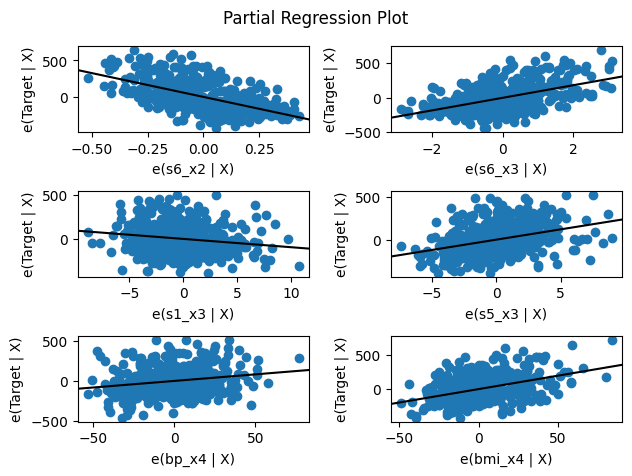

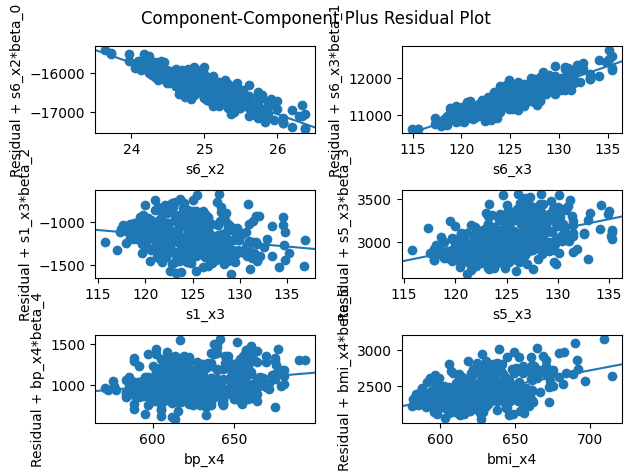

In [9]:
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)
plt.show()

fig = sm.graphics.plot_ccpr_grid(model)
fig.tight_layout(pad=1.0)
plt.show()

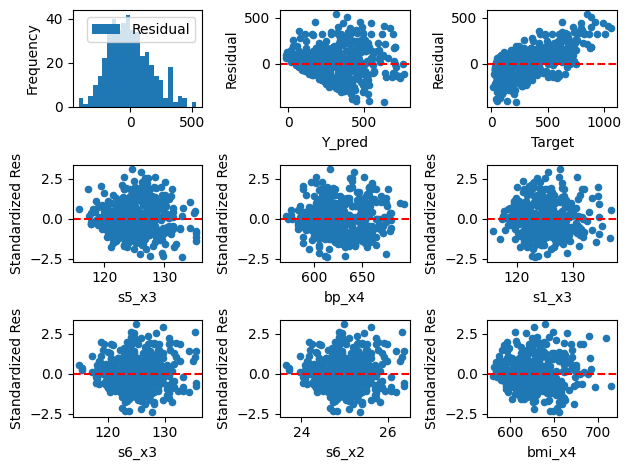

In [12]:
# Create Residuals and Residual plots
diab['Y_pred'] = model.predict(diab)
diab['Residual'] = diab['Target'] - diab['Y_pred']
Std_res = diab['Residual'].std()
diab['Standardized Res'] = diab['Residual']/Std_res

fig, ((hist1, sc_1, sc_2),(sc_4, sc_5, sc_6), (sc_7, sc_8, sc_9)) = plt.subplots(3,3)

diab.plot(y='Residual', kind='hist', bins=25, ax=hist1)
diab.plot('Y_pred','Residual', kind='scatter', ax=sc_1)
sc_1.axhline(y=0.0, c='red', linestyle='dashed')
diab.plot('Target','Residual', kind='scatter', ax=sc_2)
sc_2.axhline(y=0.0, c='red', linestyle='dashed')

diab.plot('s5_x3','Standardized Res', kind='scatter', ax=sc_4)
sc_4.axhline(y=0.0, c='red', linestyle='dashed')
diab.plot('bp_x4','Standardized Res', kind='scatter', ax=sc_5)
sc_5.axhline(y=0.0, c='red', linestyle='dashed')
diab.plot('s1_x3','Standardized Res', kind='scatter', ax=sc_6)
sc_6.axhline(y=0.0, c='red', linestyle='dashed')

diab.plot('s6_x3','Standardized Res', kind='scatter', ax=sc_7)
sc_7.axhline(y=0.0, c='red', linestyle='dashed')
diab.plot('s6_x2','Standardized Res', kind='scatter', ax=sc_8)
sc_8.axhline(y=0.0, c='red', linestyle='dashed')
diab.plot('bmi_x4','Standardized Res', kind='scatter', ax=sc_9)
sc_9.axhline(y=0.0, c='red', linestyle='dashed')

fig.tight_layout()
plt.show()

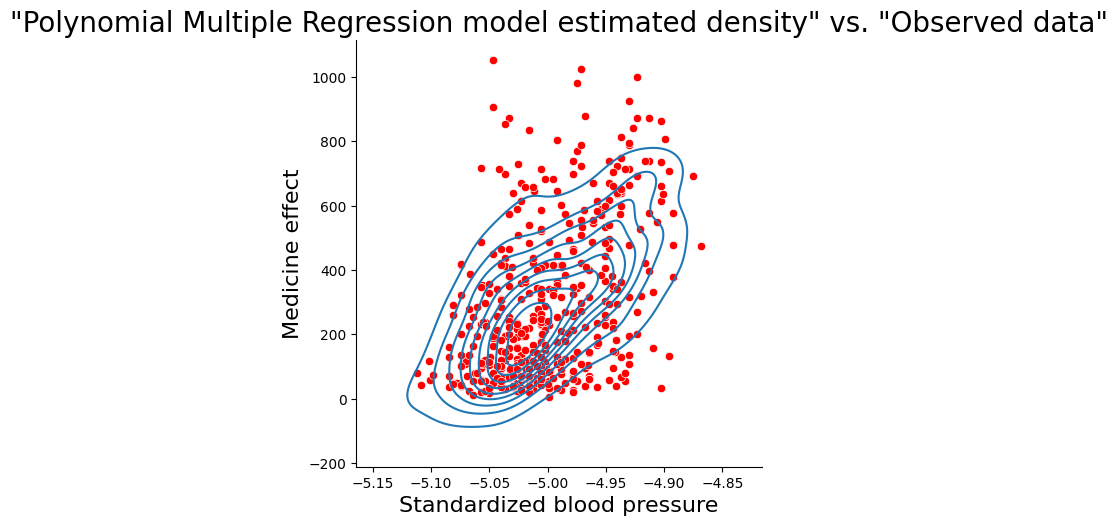

In [14]:
import seaborn as sns
# We will return our data to its original standardized form by subtracting 5 from the dataframe
diab.iloc[:,:] += -5

sns.relplot(x=diab.bp, y=diab.Target, color='red')
sns.kdeplot(x=diab.bp, y=diab.Y_pred) 
plt.xlabel('Standardized blood pressure', fontsize=16);
plt.ylabel('Medicine effect', fontsize=16);
plt.title('"Polynomial Multiple Regression model estimated density" vs. "Observed data"', fontsize=20)
plt.show()